In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Replace 'path/to/file.csv' with your actual file path
data = pd.read_csv("seattle-weather.csv")


In [4]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

<Axes: xlabel='weather', ylabel='count'>

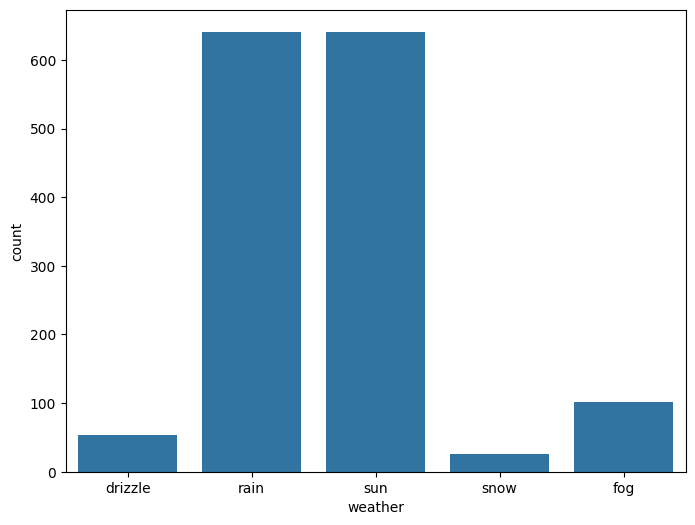

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.countplot(x='weather', data = data)

In [9]:
X = data.drop(columns=['weather'])
y = data['weather']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.46133235, -1.56004122, -1.09616752,  3.02943991],
       [-0.15455155, -1.18016631, -1.09616752, -1.70932744],
       [-0.45498272,  1.00411442,  1.00477618, -0.73369887],
       ...,
       [-0.37987493, -0.12194335, -0.21577207, -0.80338663],
       [-0.45498272, -1.47863945, -1.85650905,  0.10255419],
       [-0.45498272, -1.26156808, -0.99612258, -0.94276214]])

In [16]:
X_train[0]

array([ 0.46133235, -1.56004122, -1.09616752,  3.02943991])

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[  1   1   0   0  12]
 [  2   5   1   0  24]
 [  0   0 176   2  14]
 [  0   0   6   2   0]
 [  3   9   0   0 181]]


0.8314350797266514

In [20]:
from sklearn.preprocessing import LabelEncoder
encode_rainy = LabelEncoder()
data['weather']=encode_rainy.fit_transform(data['weather'])
Weather = pd.DataFrame(zip(encode_rainy.classes_,encode_rainy.transform(encode_rainy.classes_)),columns=['original','Encoded'])
Weather = Weather.set_index('original')
Weather

,Encoded
original,
drizzle,0
fog,1
rain,2
snow,3
sun,4


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['weather']),data['weather'],test_size=0.1,random_state=42)
print('Shape of Spitting')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_train.shape,x_test.shape))

Shape of Spitting
x_train = (1314, 4), y_train = (1314,), x_test = (1314, 4), y_test = (147, 4)


In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 782 to 1126
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1314 non-null   float64
 1   temp_max       1314 non-null   float64
 2   temp_min       1314 non-null   float64
 3   wind           1314 non-null   float64
dtypes: float64(4)
memory usage: 51.3 KB


In [23]:
rand = RandomForestClassifier(random_state=42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [24]:
pred_rand = rand.predict(x_test)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators' : [300,400,500],
    'max_depth' : [5,6,7],
    'min_samples_split': [2,5,8]
}

grid_rand = GridSearchCV(rand, params, cv= 3, verbose = 3, n_jobs = 1)
grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print("Best Score:", grid_rand.best_score_)
print("Best Params:", grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.849 total time=   0.8s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.833 total time=   0.8s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.877 total time=   0.8s
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=400;, score=0.849 total time=   1.2s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=400;, score=0.836 total time=   1.2s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=400;, score=0.877 total time=   1.1s
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=500;, score=0.852 total time=   1.5s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=500;, score=0.836 total time=   1.4s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=500;, score=0.872 total time=   1.3s
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=300;, 

C:\Users\Harsh Vishwakarma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh Vishwakarma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh Vishwakarma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [26]:
import pickle
import numpy as np

In [27]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rand, file)

In [38]:
prediction = rand.predict(np.array([]).reshape(1, -1))

C:\Users\Harsh Vishwakarma\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1000.   20.   40.  200.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [2]:
prediction_str = str(prediction[0])

NameError: name 'prediction' is not defined

In [1]:
print(prediction_str)

NameError: name 'prediction_str' is not defined